<a href="https://www.kaggle.com/code/eavprog/abscur-tovar-sharp?scriptVersionId=135268974" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)

ДОБРО ПОЖАЛОВАТЬ НА СТРАНИЦУ РЕЙТИНГОВ ТОВАРОВ МОСКОВСКОЙ БИРЖИ ПО КОЭФФИЦИЕНТУ ШАРПА: АНАЛИЗ ЭФФЕКТИВНОСТИ ИНВЕСТИЦИЙ

Мы рады представить вам страницу с рейтингами товаров Московской биржи по коэффициенту Шарпа, которая предоставляет уникальную возможность оценить эффективность инвестиций в различные товары. Наша страница обеспечивает обширный анализ и классификацию товаров на основе их доходности и риска.

В общей сложности на странице представлены 9 товаров, включающих золото, серебро, нефть, газ, платину и другие. Мы предлагаем вам ознакомиться с рейтингами на различные временные промежутки, начиная от месяца и до пяти лет. Такой широкий спектр временных интервалов позволяет вам получить полное представление о доходности товаров на протяжении различных периодов.

На странице вы найдете столбчатые диаграммы с коэффициентами Шарпа для долларового и абсолютного курса товаров, отсортированными по убыванию. Горизонтальная ось диаграмм содержит коды товаров, что обеспечивает удобную идентификацию каждого товара на графике. Дополнительно, мы предоставляем вторую диаграмму, которая отображает абсолютный курс товаров.

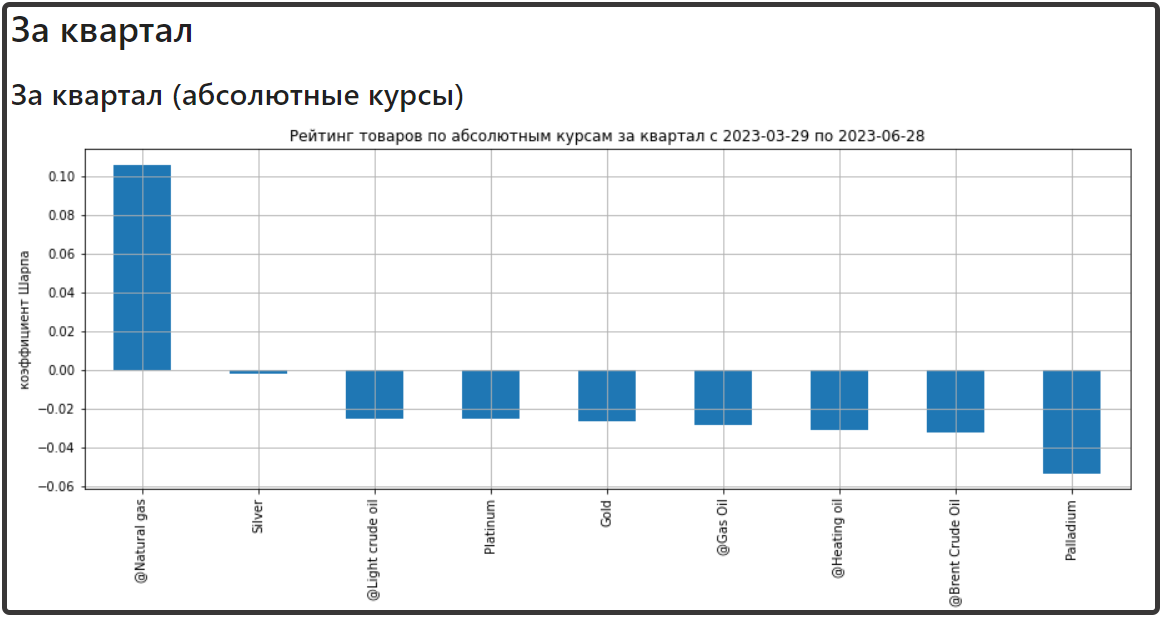

Коэффициент Шарпа считается как отношение средней дневной доходнсти к стандартному отклонению этой средней дневной доходности.

$$
coefSharp = \frac{mean(\frac{A_{i+1}-A_i}{A_i},i=start...end)}{std(\frac{A_{i+1}-A_i}{A_i},i=start...end)}
$$

Под графиками находится таблица, содержащая информацию о самых выгодных и наименее выгодных товарах, основанную на высоком и низком значении коэффициента Шарпа соответственно. В таблице указаны коды товаров, категории и значения коэффициента Шарпа для каждого товара. Также, мы предоставляем ссылки на страницу с графиком истории абсолютного и долларового курса каждого товара, чтобы вы могли получить более подробную информацию.

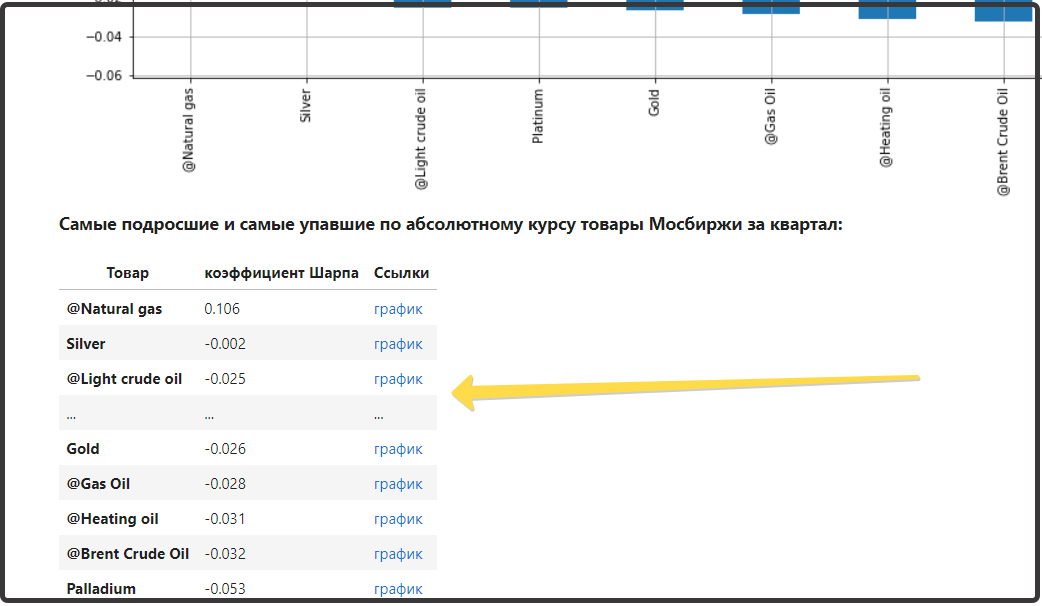

Для вашего удобства мы разместили ссылки на разделы проекта, соответствующие каждому временному промежутку, чтобы вы могли легко перейти к интересующей вас информации. Перемещение между товарами также возможно благодаря правому боковому меню, которое обеспечивает быстрый доступ к каждому товару.

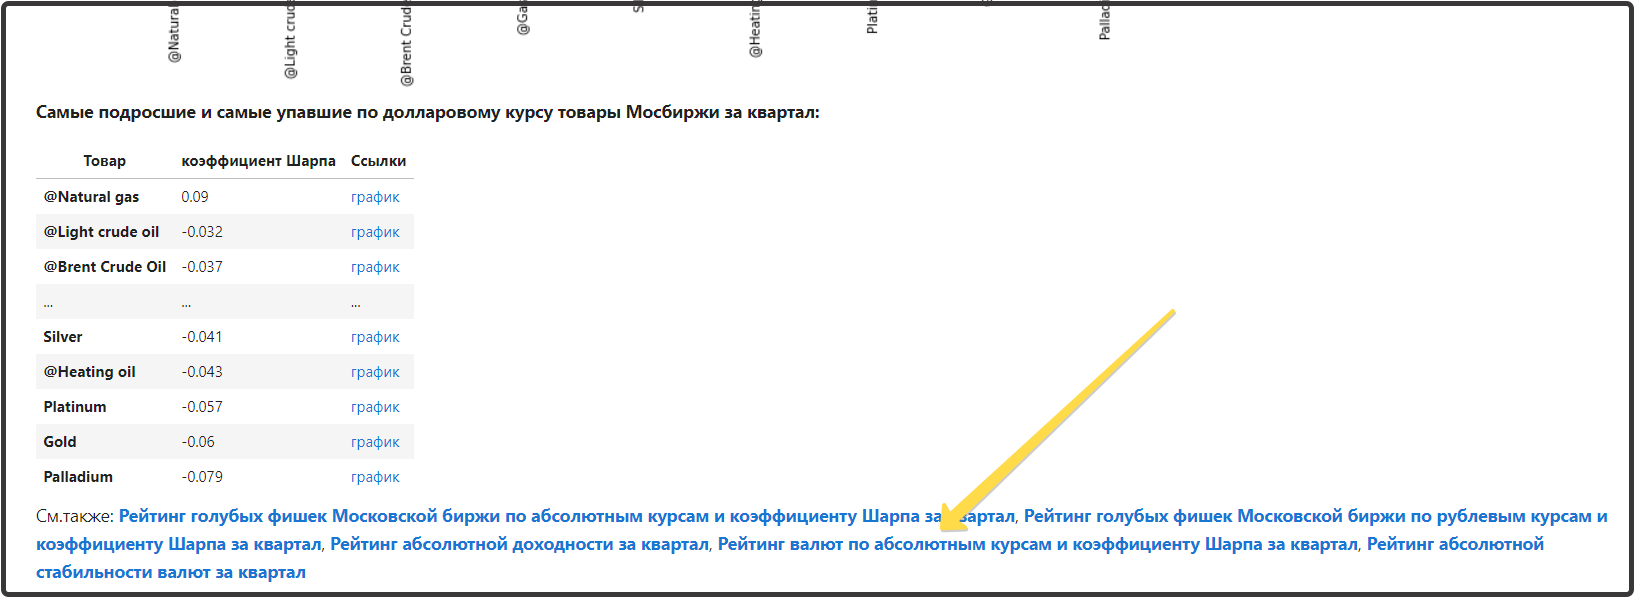

Под описанием вы найдете оглавление всего проекта, которое содержит ссылки на все разделы проекта. Это обеспечивает удобный способ навигации и позволяет вам быстро переходить к различным аспектам и анализу товаров.

Мы уверены, что наша страница с рейтингами товаров Московской биржи по коэффициенту Шарпа предоставит вам ценную информацию и поможет принять обоснованные решения в сфере инвестиций. Мы продолжаем работать над улучшением нашего сервиса, чтобы предоставить вам наилучший опыт в анализе финансовых данных.

# Оглавление проекта "Абсолютный валютный курс" 

![Проект "Абсолютный валютный курс"](https://i.ibb.co/cL0D27B/abscur-znak.jpg)

## Представительства проекта:
[**БЛОГ**](http://www.abscur.ru) - 
[**VK**](https://vk.com/abscur) - 
[**WhatsApp**](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs) - 
[**Viber**](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc) - 
[**Telegram**](https://t.me/AbsCur) - 
[**ОК**](https://ok.ru/group/53547043520717) - 
[**GitHub**](https://github.com/prog815/abscur) - 
[**YouTube**](https://www.youtube.com/@eavprog8/community) - 
[**Smart-Lab**](https://smart-lab.ru/my/eavpred/) - 
[**VC.ru**](https://vc.ru/s/1826351-absolyutnyy-kurs-valyut) - 
[**Kaggle**](https://www.kaggle.com/code/eavprog/abscur-about)

## Абсолютные валютные курсы:
- [О проекте](https://www.kaggle.com/eavprog/abscur-about)
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Графики истории абсолютных валютных курсов](https://www.kaggle.com/eavprog/abscur-hist)
- [Стоимость Абса](https://www.kaggle.com/eavprog/abscur-stoimost-absa)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)
- [Рейтинг абсолютной стабильности валют](https://www.kaggle.com/eavprog/abscur-reit-stabil)

## Парные валютные курсы
- [Графики истории парных валютных курсов](https://www.kaggle.com/eavprog/abscur-par-hist)

## Голубые фишки Московской биржи
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)
- [Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp)
- [Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-bluefish-sharp-rub)

## Товары Московской биржи
- [Абсолютные курсы товаров Мосбиржи](https://www.kaggle.com/eavprog/mmvb-abscur-tovar)
- [Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)](https://www.kaggle.com/eavprog/abscur-tovar-sharp)

---



# За месяц

## За месяц (абсолютные курсы)

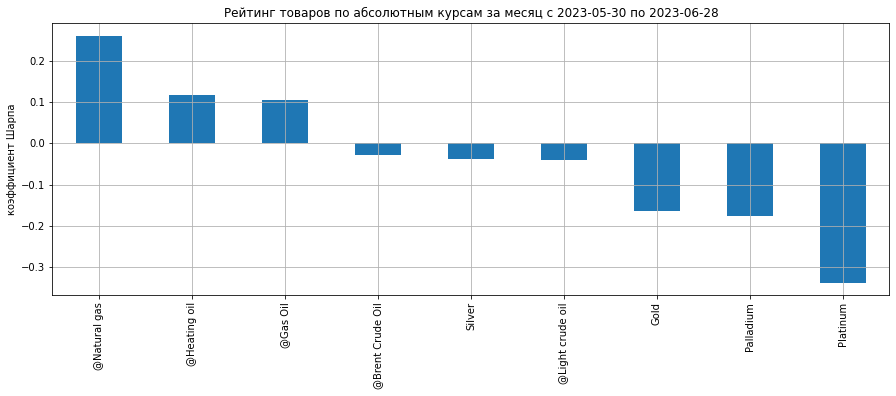

**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за месяц:**

|Товар|коэффициент Шарпа|Ссылки|
|-|-|-|
|**@Natural gas**|0.262|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|
|**@Heating oil**|0.119|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**@Gas Oil**|0.106|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|...|...|...|
|**Gold**|-0.164|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Palladium**|-0.177|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|
|**Platinum**|-0.339|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-месяц), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-месяц), [**Рейтинг абсолютной доходности за месяц**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-месяц), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-месяц), [**Рейтинг абсолютной стабильности валют за месяц**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-месяц)

## За месяц (долларовые курсы)

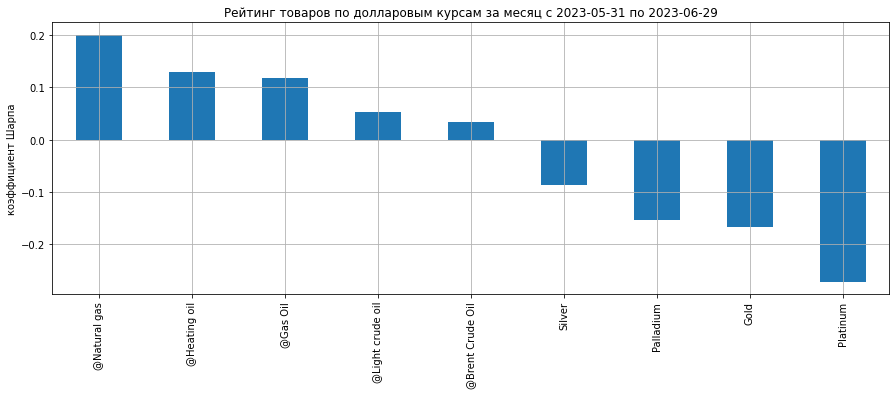

**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за месяц:**

|Товар|коэффициент Шарпа|Ссылки|
|-|-|-|
|**@Natural gas**|0.201|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|
|**@Heating oil**|0.13|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**@Gas Oil**|0.119|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|...|...|...|
|**Palladium**|-0.155|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|
|**Gold**|-0.167|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Platinum**|-0.273|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-месяц), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-месяц), [**Рейтинг абсолютной доходности за месяц**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-месяц), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-месяц), [**Рейтинг абсолютной стабильности валют за месяц**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-месяц)

--- 


# За квартал

## За квартал (абсолютные курсы)

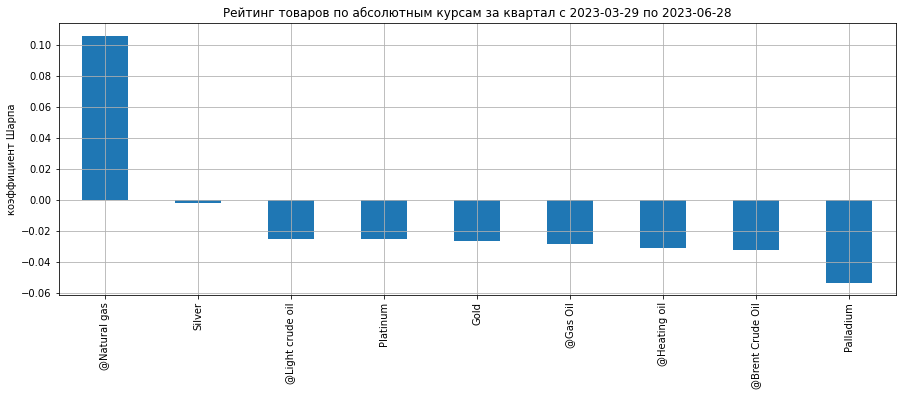

**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за квартал:**

|Товар|коэффициент Шарпа|Ссылки|
|-|-|-|
|**@Natural gas**|0.106|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|
|**Silver**|-0.002|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**@Light crude oil**|-0.025|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Light-crude-oil)|
|...|...|...|
|**@Heating oil**|-0.031|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**@Brent Crude Oil**|-0.032|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|**Palladium**|-0.053|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-квартал), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-квартал), [**Рейтинг абсолютной доходности за квартал**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-квартал), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-квартал), [**Рейтинг абсолютной стабильности валют за квартал**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-квартал)

## За квартал (долларовые курсы)

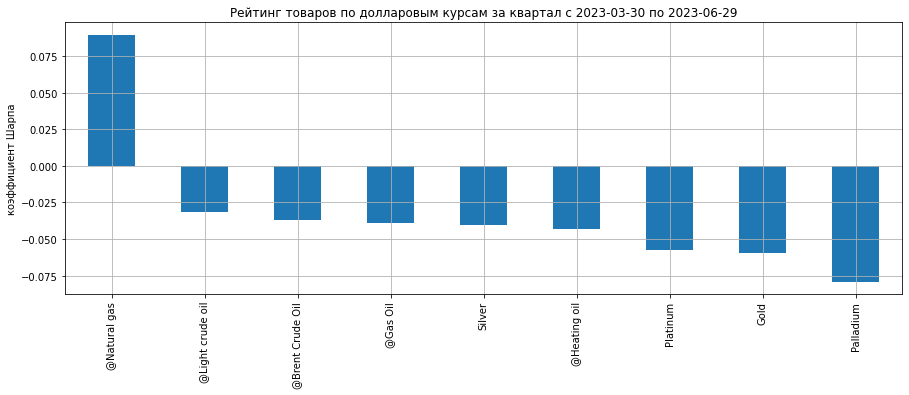

**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за квартал:**

|Товар|коэффициент Шарпа|Ссылки|
|-|-|-|
|**@Natural gas**|0.09|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|
|**@Light crude oil**|-0.032|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Light-crude-oil)|
|**@Brent Crude Oil**|-0.037|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|...|...|...|
|**Platinum**|-0.057|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|
|**Gold**|-0.06|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Palladium**|-0.079|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-квартал), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-квартал), [**Рейтинг абсолютной доходности за квартал**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-квартал), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-квартал), [**Рейтинг абсолютной стабильности валют за квартал**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-квартал)

--- 


# За полгода

## За полгода (абсолютные курсы)

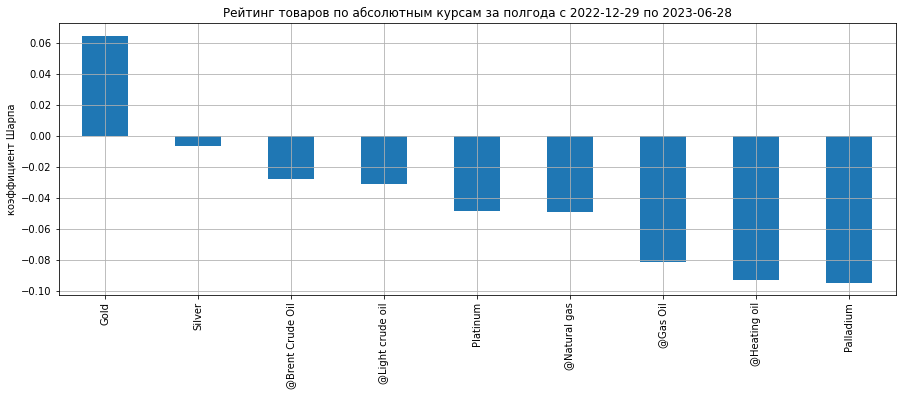

**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за полгода:**

|Товар|коэффициент Шарпа|Ссылки|
|-|-|-|
|**Gold**|0.065|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Silver**|-0.006|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**@Brent Crude Oil**|-0.028|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|...|...|...|
|**@Gas Oil**|-0.081|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Heating oil**|-0.093|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**Palladium**|-0.095|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-полгода), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-полгода), [**Рейтинг абсолютной доходности за полгода**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-полгода), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-полгода), [**Рейтинг абсолютной стабильности валют за полгода**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-полгода)

## За полгода (долларовые курсы)

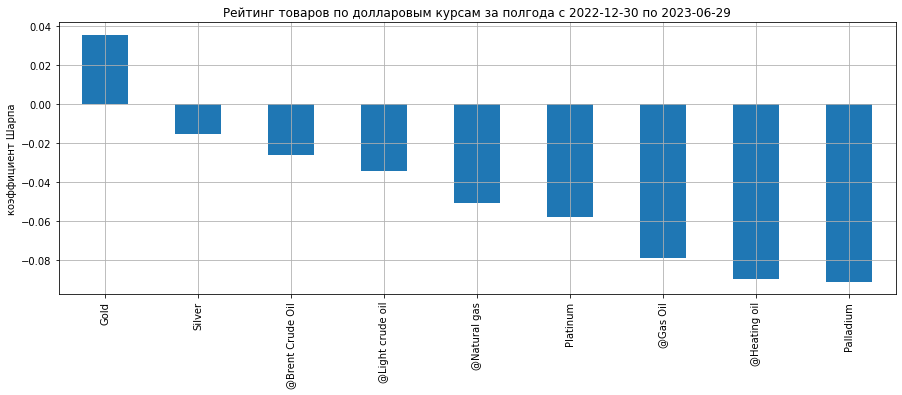

**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за полгода:**

|Товар|коэффициент Шарпа|Ссылки|
|-|-|-|
|**Gold**|0.036|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Silver**|-0.015|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**@Brent Crude Oil**|-0.026|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|...|...|...|
|**@Gas Oil**|-0.079|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Heating oil**|-0.09|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**Palladium**|-0.091|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-полгода), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-полгода), [**Рейтинг абсолютной доходности за полгода**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-полгода), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-полгода), [**Рейтинг абсолютной стабильности валют за полгода**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-полгода)

--- 


# За год

## За год (абсолютные курсы)

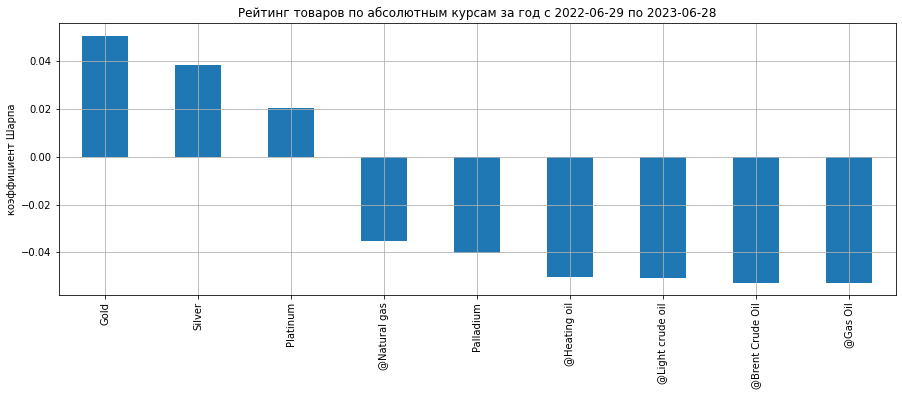

**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за год:**

|Товар|коэффициент Шарпа|Ссылки|
|-|-|-|
|**Gold**|0.051|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Silver**|0.038|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**Platinum**|0.021|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|
|...|...|...|
|**@Light crude oil**|-0.051|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Light-crude-oil)|
|**@Brent Crude Oil**|-0.053|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|**@Gas Oil**|-0.053|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-год), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-год), [**Рейтинг абсолютной доходности за год**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-год), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-год), [**Рейтинг абсолютной стабильности валют за год**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-год)

## За год (долларовые курсы)

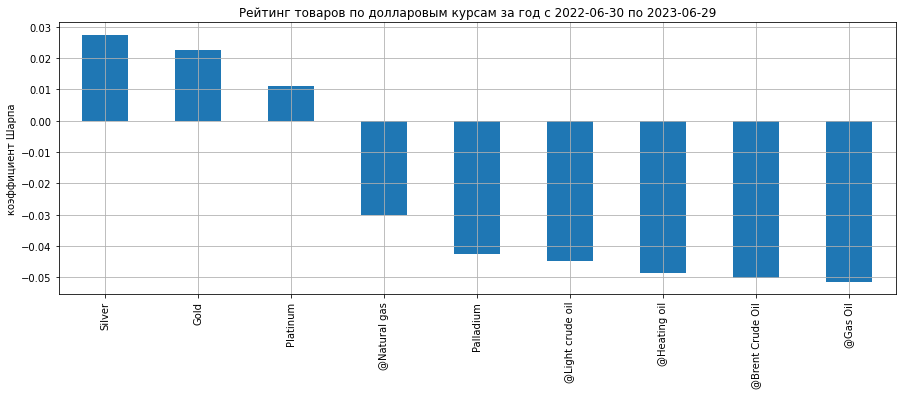

**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за год:**

|Товар|коэффициент Шарпа|Ссылки|
|-|-|-|
|**Silver**|0.027|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**Gold**|0.023|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Platinum**|0.011|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|
|...|...|...|
|**@Heating oil**|-0.049|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**@Brent Crude Oil**|-0.05|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|**@Gas Oil**|-0.051|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-год), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-год), [**Рейтинг абсолютной доходности за год**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-год), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-год), [**Рейтинг абсолютной стабильности валют за год**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-год)

--- 


# За 2 года

## За 2 года (абсолютные курсы)

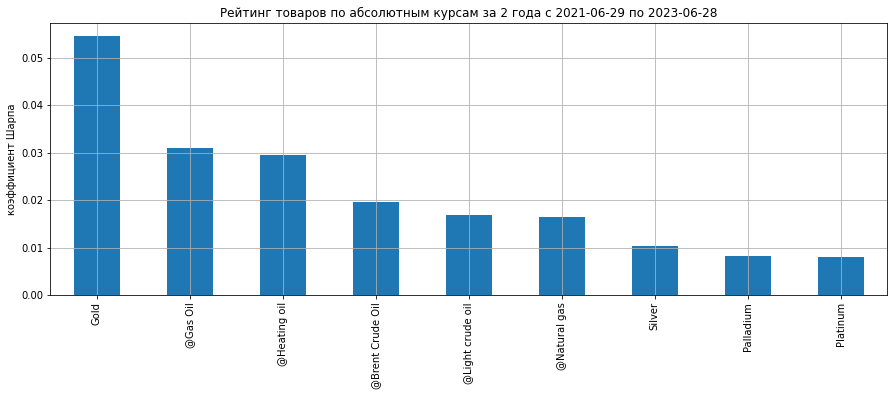

**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за 2 года:**

|Товар|коэффициент Шарпа|Ссылки|
|-|-|-|
|**Gold**|0.055|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**@Gas Oil**|0.031|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Heating oil**|0.03|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|...|...|...|
|**Silver**|0.01|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**Palladium**|0.008|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|
|**Platinum**|0.008|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-2-года), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-2-года), [**Рейтинг абсолютной доходности за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-2-года), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-2-года), [**Рейтинг абсолютной стабильности валют за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-2-года)

## За 2 года (долларовые курсы)

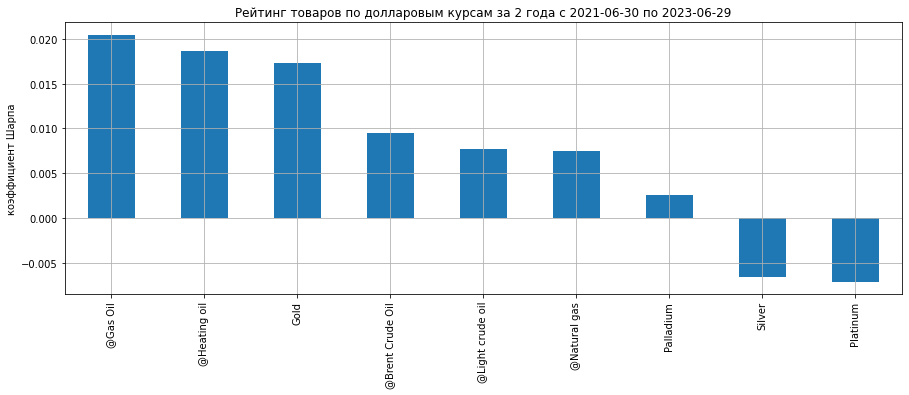

**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за 2 года:**

|Товар|коэффициент Шарпа|Ссылки|
|-|-|-|
|**@Gas Oil**|0.02|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Heating oil**|0.019|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**Gold**|0.017|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|...|...|...|
|**Palladium**|0.003|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|
|**Silver**|-0.007|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**Platinum**|-0.007|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-2-года), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-2-года), [**Рейтинг абсолютной доходности за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-2-года), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-2-года), [**Рейтинг абсолютной стабильности валют за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-2-года)

--- 


# За 3 года

## За 3 года (абсолютные курсы)

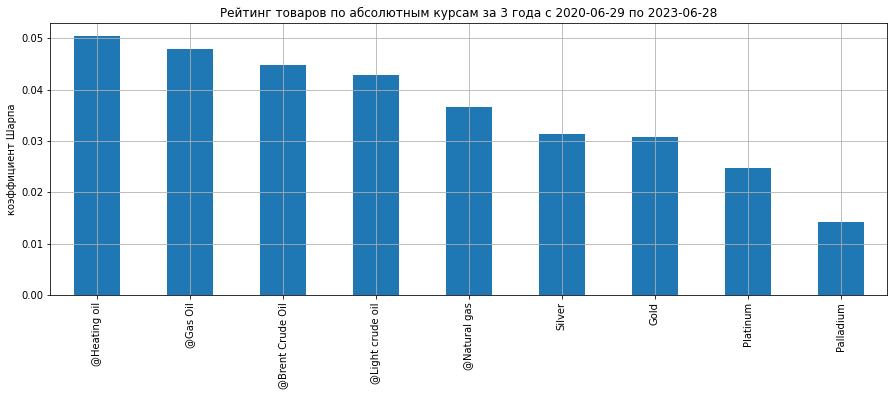

**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за 3 года:**

|Товар|коэффициент Шарпа|Ссылки|
|-|-|-|
|**@Heating oil**|0.05|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**@Gas Oil**|0.048|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Brent Crude Oil**|0.045|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|...|...|...|
|**Gold**|0.031|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Platinum**|0.025|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|
|**Palladium**|0.014|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-3-года), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-3-года), [**Рейтинг абсолютной доходности за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-3-года), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-3-года), [**Рейтинг абсолютной стабильности валют за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-3-года)

## За 3 года (долларовые курсы)

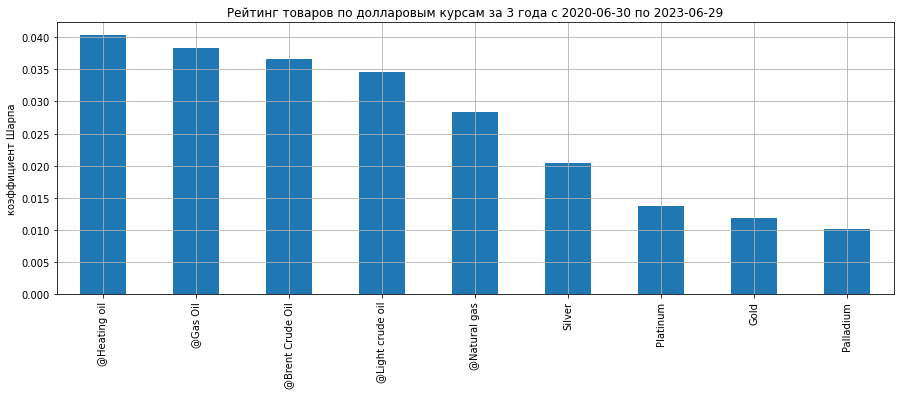

**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за 3 года:**

|Товар|коэффициент Шарпа|Ссылки|
|-|-|-|
|**@Heating oil**|0.04|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**@Gas Oil**|0.038|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Brent Crude Oil**|0.037|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|...|...|...|
|**Platinum**|0.014|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|
|**Gold**|0.012|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Palladium**|0.01|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-3-года), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-3-года), [**Рейтинг абсолютной доходности за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-3-года), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-3-года), [**Рейтинг абсолютной стабильности валют за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-3-года)

--- 


# За 5 лет

## За 5 лет (абсолютные курсы)

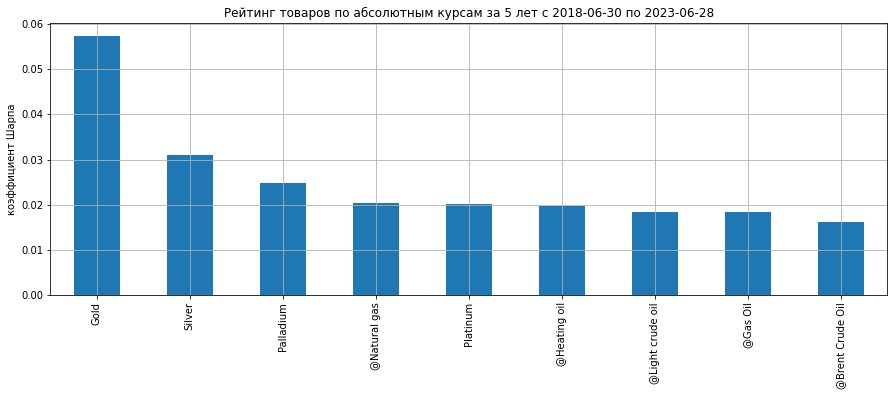

**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за 5 лет:**

|Товар|коэффициент Шарпа|Ссылки|
|-|-|-|
|**Gold**|0.057|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Silver**|0.031|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**Palladium**|0.025|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|
|...|...|...|
|**@Light crude oil**|0.018|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Light-crude-oil)|
|**@Gas Oil**|0.018|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Brent Crude Oil**|0.016|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-5-лет), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-5-лет), [**Рейтинг абсолютной доходности за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-5-лет), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-5-лет), [**Рейтинг абсолютной стабильности валют за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-5-лет)

## За 5 лет (долларовые курсы)

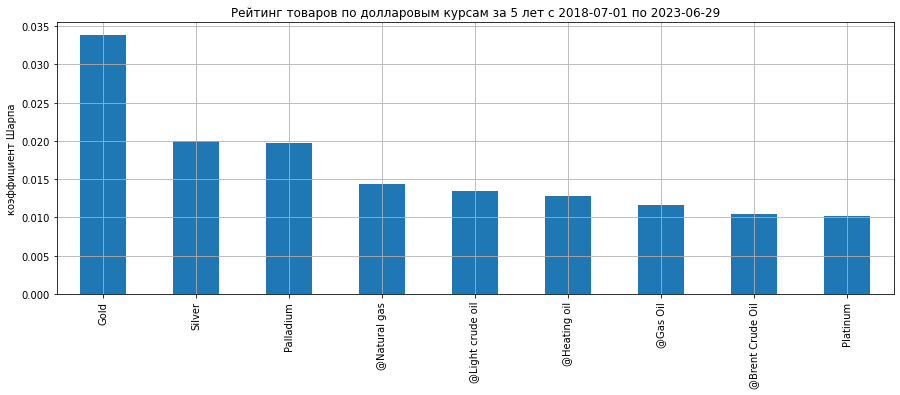

**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за 5 лет:**

|Товар|коэффициент Шарпа|Ссылки|
|-|-|-|
|**Gold**|0.034|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Silver**|0.02|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**Palladium**|0.02|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|
|...|...|...|
|**@Gas Oil**|0.012|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Brent Crude Oil**|0.01|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|**Platinum**|0.01|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-5-лет), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-5-лет), [**Рейтинг абсолютной доходности за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-5-лет), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-5-лет), [**Рейтинг абсолютной стабильности валют за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-5-лет)

--- 


In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import abscur_menu
import abscur_post as ap

# меню проекта печатаем
abscur_menu.print_menu()

# абсолютные курсы товаров подкачиваем
tov_abs = pd.read_csv("/kaggle/input/mmvb-abscur-tovar/tov_abscur.csv",index_col=0,parse_dates=['Date'])
tov_close = pd.read_csv("/kaggle/input/mmvb-tovar/close_table.csv",index_col=0,parse_dates=['Dates'])

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

cnt = 0
texts = []

for per,title_per in diap:
    display(Markdown("# За " + title_per))
    
    display(Markdown("## За " + title_per + " (абсолютные курсы)"))
    
    date_start = tov_abs.asfreq(freq="D").index[-per]
    date_finish = tov_abs.index[-1]
    
    res = (tov_abs[tov_abs.index >= date_start] / tov_abs[tov_abs.index >= date_start].median()).pct_change()
    res = res.mean()/res.std()
    
    res.sort_values(ascending=False,inplace=True)
    text = "Рейтинг товаров по абсолютным курсам за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d")
    res.plot.bar(grid=True,title=text,ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    texts.append(text)
    plt.savefig(str(cnt) + ".png")
    plt.show()
    cnt += 1
    
    text = "**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за " + title_per + ":**\n\n"
    text += "|Товар|коэффициент Шарпа|Ссылки|\n"
    text += "|-|-|-|\n"
    for n in range(3):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + str(np.round(res[ticker],3)) + "|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#" + ticker.replace(" ","-") + ")|\n"
    text += "|...|...|...|\n"
    for n in range(len(res.index)-3,len(res.index)):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + str(np.round(res[ticker],3)) + "|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#" + ticker.replace(" ","-") + ")|\n"
    display(Markdown(text))
    
    text = "См.также: "
    text += "[**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной доходности за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной стабильности валют за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))
    
    display(Markdown("## За " + title_per + " (долларовые курсы)"))
    
    date_start = tov_close.asfreq(freq="D").index[-per]
    date_finish = tov_close.index[-1]
    
    res = (tov_close[tov_close.index >= date_start] / tov_close[tov_close.index >= date_start].median()).pct_change()
    res = res.mean()/res.std()
    
    res.sort_values(ascending=False,inplace=True)
    text = "Рейтинг товаров по долларовым курсам за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d")
    res.plot.bar(grid=True,title=text,ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    texts.append(text)
    plt.savefig(str(cnt) + ".png")
    plt.show()
    cnt += 1
    
    text = "**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за " + title_per + ":**\n\n"
    text += "|Товар|коэффициент Шарпа|Ссылки|\n"
    text += "|-|-|-|\n"
    for n in range(3):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + str(np.round(res[ticker],3)) + "|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#" + ticker.replace(" ","-") + ")|\n"
    text += "|...|...|...|\n"
    for n in range(len(res.index)-3,len(res.index)):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + str(np.round(res[ticker],3)) + "|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#" + ticker.replace(" ","-") + ")|\n"
    display(Markdown(text))
    
    text = "См.также: "
    text += "[**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной доходности за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной стабильности валют за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))
    
    display(Markdown("--- \n"))
#     break
    
num = np.random.randint(cnt)
ap.send_img_and_text(str(num) + ".png",texts[num] + "\n---\nИсточник - https://www.kaggle.com/code/eavprog/abscur-tovar-sharp")